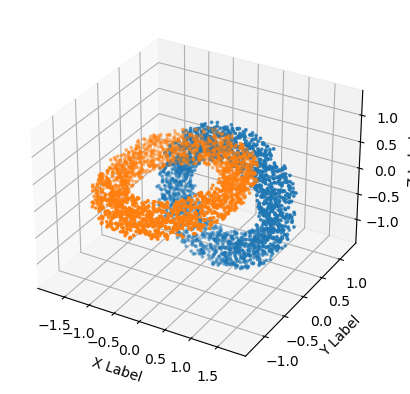

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data= np.loadtxt("dataset-vis.txt", delimiter=",")
X1 = data[:2000,0]
Y1 = data[:2000,1]
Z1 = data[:2000,2]

X2 = data[2000:,0]
Y2 = data[2000:,1]
Z2 = data[2000:,2]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X2, Y2, Z2, s = 3)
ax.scatter(X1, Y1, Z1, s = 3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

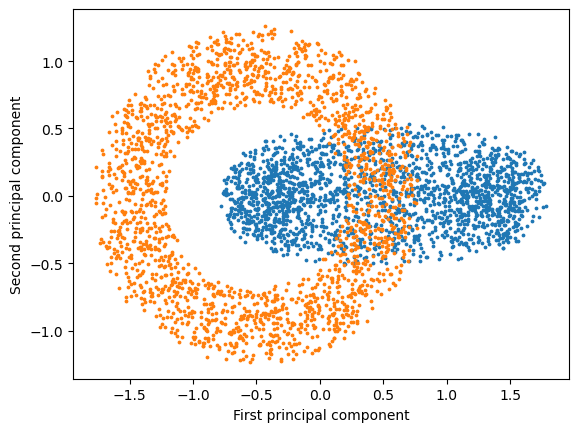

In [3]:
from sklearn.decomposition import PCA # Import PCA
pca = PCA(whiten=False, svd_solver = "full") #Intialize PCA
pca.fit(data) #Fit PCA to data
two_principal = pca.components_[0:2] # Extract principal components
pca_projection = two_principal @ data.T # Calculate the projection of training data onto first two principal components by matrixmultiplication

X1 = pca_projection[0, :2000]
Y1 = pca_projection[1, :2000]

X2 = pca_projection[0,2000:]
Y2 = pca_projection[1,2000:]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 3)
ax.scatter(X2, Y2, s = 3)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

plt.show()

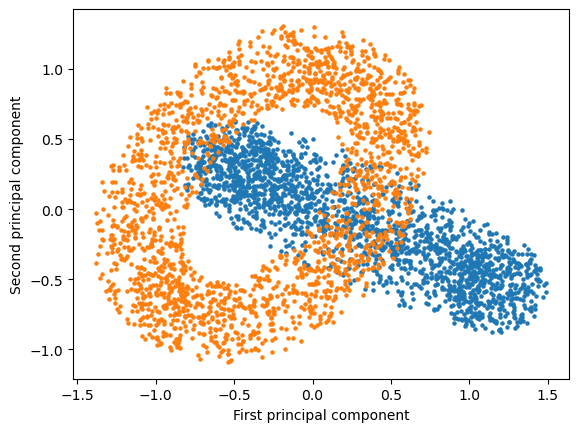

In [17]:
mu = np.mean(data, axis=0) # Compute mean of each feature
sd = np.std(data, axis=0, ddof = 0) # Compute (in-sample) standard deviation of each feature
def normalize(X,mean,sd): # Function to normalize array given mean and standard deviation
     D = np.diag(1/sd) # diagonalize std deviation vector
     return X @ D - mu @ D
data_norm = normalize(data, mu, sd)


pca1 = PCA(whiten=False, svd_solver="full") #Intialize PCA
pca1.fit(data_norm) #Fit PCA to data
two_principal1 = pca1.components_[0:2] # Extract principal components


pca_projection1 = two_principal1 @ data.T # Calculate the projection of training data onto first two principal components by matrixmultiplication

X1 = pca_projection1[0, :2000]
Y1 = pca_projection1[1, :2000]

X2 = pca_projection1[0,2000:]
Y2 = pca_projection1[1,2000:]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 5)
ax.scatter(X2, Y2, s = 5)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

plt.savefig("Non-normalized_transform.png")

In [51]:
from sklearn.manifold import TSNE
tsne30 = TSNE(learning_rate="auto", init = "random", n_jobs=-1, perplexity=30).fit_transform(data_norm)
tsne400 = TSNE(learning_rate="auto", init = "random", n_jobs=-1, perplexity=400).fit_transform(data_norm)

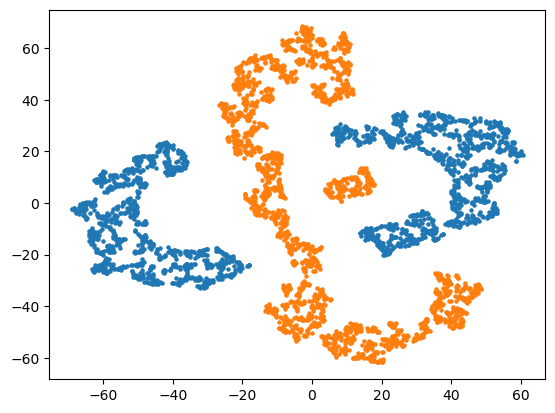

In [52]:
# Plot tsne30
X1 = tsne30[:2000,0]
Y1 = tsne30[:2000,1]

X2 = tsne30[2000:,0]
Y2 = tsne30[2000:,1]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 5)
ax.scatter(X2, Y2, s = 5)
plt.show()

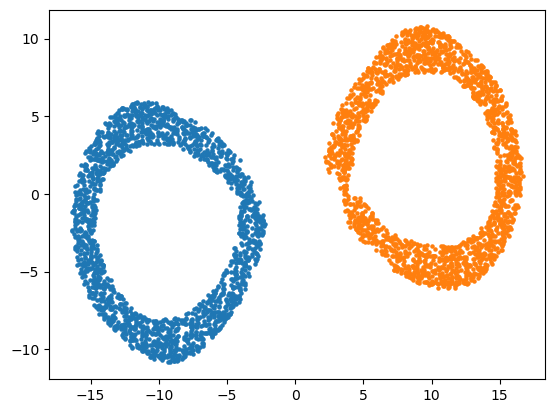

In [53]:
# Plot tsne400
X1 = tsne400[:2000,0]
Y1 = tsne400[:2000,1]

X2 = tsne400[2000:,0]
Y2 = tsne400[2000:,1]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 5)
ax.scatter(X2, Y2, s = 5)
plt.show()

In [48]:
tsne30PCA = TSNE(learning_rate="auto", init = "pca", n_jobs=-1, perplexity=30).fit_transform(data_norm)
tsne400PCA = TSNE(learning_rate="auto", init = "pca", n_jobs=-1, perplexity=400).fit_transform(data_norm)

c:\Users\asr\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
c:\Users\asr\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


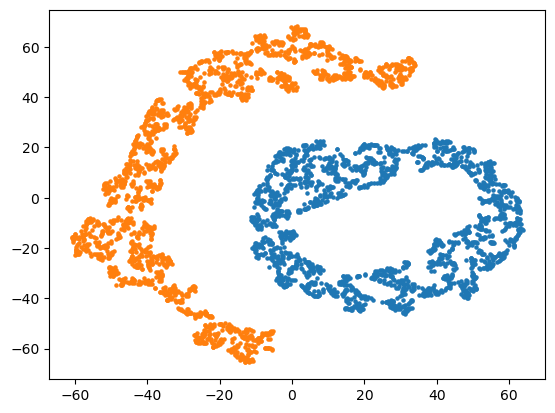

In [54]:
# Plot tsne30PCA
X1 = tsne30PCA[:2000,0]
Y1 = tsne30PCA[:2000,1]

X2 = tsne30PCA[2000:,0]
Y2 = tsne30PCA[2000:,1]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 5)
ax.scatter(X2, Y2, s = 5)
plt.show()

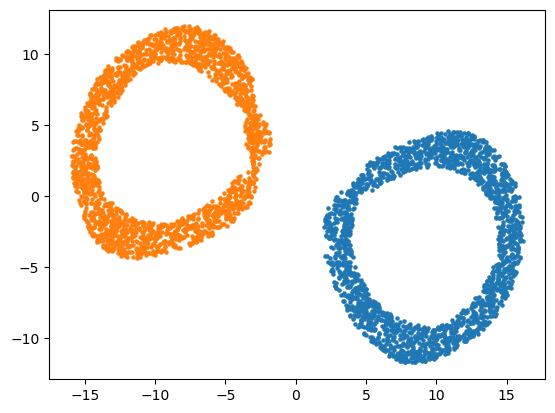

In [55]:
# Plot tsne400
X1 = tsne400PCA[:2000,0]
Y1 = tsne400PCA[:2000,1]

X2 = tsne400PCA[2000:,0]
Y2 = tsne400PCA[2000:,1]


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X1, Y1, s = 5)
ax.scatter(X2, Y2, s = 5)
plt.show()